In [ ]:
#get the data from the drive
from google.colab import drive
path = drive.mount('/content/drive/')

In [ ]:
import numpy as np
import csv 

In [ ]:
def get_data(file_name):
  with open(file_name, newline='') as csvfile:
    content = csv.reader(csvfile)
    line_count = 0
    for row in content:
      if line_count > 0:
        data = [float(row[0]), float(row[1]), float(row[2]), float(row[3]), float(row[4]), float(row[5]), float(row[6])]
        all_data.append(data)
      
      line_count += 1  

In [ ]:
all_data = []
get_data(r'/content/drive/MyDrive/Capstone Material/Code/final_train_data.csv')
data = np.array(all_data)
print(data.shape)
np.random.shuffle(data)

training_data = []
training_label = []

for d in data:
  training_data.append([d[2], d[3], d[4], d[5], d[6]])
  training_label.append([d[0], d[1]])

In [ ]:
all_data = []
get_data(r'/content/drive/MyDrive/Capstone Material/Code/final_test_data.csv')
data = np.array(all_data)
print(data.shape)
np.random.shuffle(data)

testing_data = []
testing_label = []

for d in data:
  if [d[2], d[3], d[4]] not in training_data:
    testing_data.append([d[2], d[3], d[4], d[5], d[6]])
    testing_label.append([d[0], d[1]])

print(len(testing_data))

In [ ]:
#Neural network - MLPRegressor from scikit 
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

#neural network generated 
clf = MLPRegressor(hidden_layer_sizes=(150,10), alpha=1e-5, random_state=1)

#neural net trained
clf.fit (training_data, training_label)

#neural net tested
pred = clf.predict(testing_data)


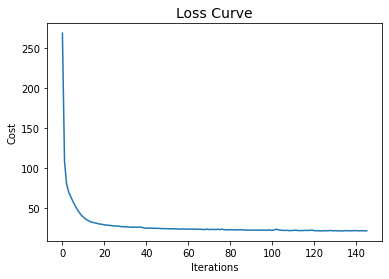

Score: 0.831543
Best loss: 20.951832
No of iters done: 146.000000
Mean Absolute Error: 5.12543204101263
Mean Squared Error: 51.51381684189777
Root Mean Squared Error: 7.113592576208385
Mean Absolute Percentage Error: 0.8486334033090104


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

print ("Score: %f" %clf.score(testing_data, testing_label))
print("Best loss: %f" %clf.best_loss_)
print("No of iters done: %f" %clf.n_iter_)

print('Mean Absolute Error:', metrics.mean_absolute_error(testing_label, pred))
print('Mean Squared Error:', metrics.mean_squared_error(testing_label, pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(testing_label, pred, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(testing_label, pred))
